# **Hands-on 2 kNN Notebook (Tutorial)**

## **1.1 Fundamentos de la técnica**

La tecnica KNN (K-Nearest Neighbors) se basa en como su nombre lo indica clasificar instancias basandose en las instancias clasificadas mas cercanas. Es decir que asume la idea de que elementos similares suelen estar cerca unos de otros.  
El flujo de la tecnica es de esta manera:
1. Tenemos un conjunto de datos clasificados
2. Ingresamos un dato desconocido
3. Buscamos los K puntos mas cercanos (La K es dinamica, segun nuestro caso)
4. Observamos que categorias tienen estos vecinos y segun su mayoria asignamos la categoria a esta nueva instancia.  
KNN se considera un metodo de aprendizaje supervisado porque se necesita de un conjunto previamente etiquetado.

## **1.2 Modelo Matemático**

Para este modelo deberemos tener un modelo de entrenamiento previo:  
$$
D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}
$$  

Deberemos calcular la distancia:  
Distancia euclidiana (la mas comunmente usada):  
$$
d(x_0, x_i) = \sqrt{\sum_{j=1}^{m} (x_{0j} - x_{ij})^2}
$$


Distancia Manhattan:  
$$
d(x_0, x_i) = \sum_{j=1}^{m} |x_{0j} - x_{ij}|
$$  

Posterior a sacar las distancias las distancias se ordenan y se obtienen los K mas cercanos para posteriormente seleccionar la etiqueta/clase mas elegida.

$$
N_K(x_0) = \text{conjunto de los K puntos } x_i \text{ con menor } d(x_0, x_i)
$$

Toma de Decision:
$$
\hat{y} = \mathrm{modo}\left(\{y_i : x_i \in \mathcal{N}_k(x)\}\right)
$$

## **1.3 Descripción de la librería, clases, funciones (python) empleadas en su respectiva seccion**

> *Se explicara en cada seccion cuando se vaya a utilizar*  

## **1.4 Pipeline**

### **Preprocesamiento**

Para la seccion del preprocesamiento traeremos dos bibliotecas, la de pandas para poder manejar nuestro dataset de datos, la de matplotlib y seaborn seran para mostrar de manera grafica las estadisticas obtenidas en el preprocesamieto.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
dataset = pd.read_csv("heart.csv")

A continuacion utilizaremos el metodo describe que nos trae una gran cantidad de estadistias de nuestras variables numericas.  
Entre estas estadisticas tenemos, desviacion estandar, max, min, avg.

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [61]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


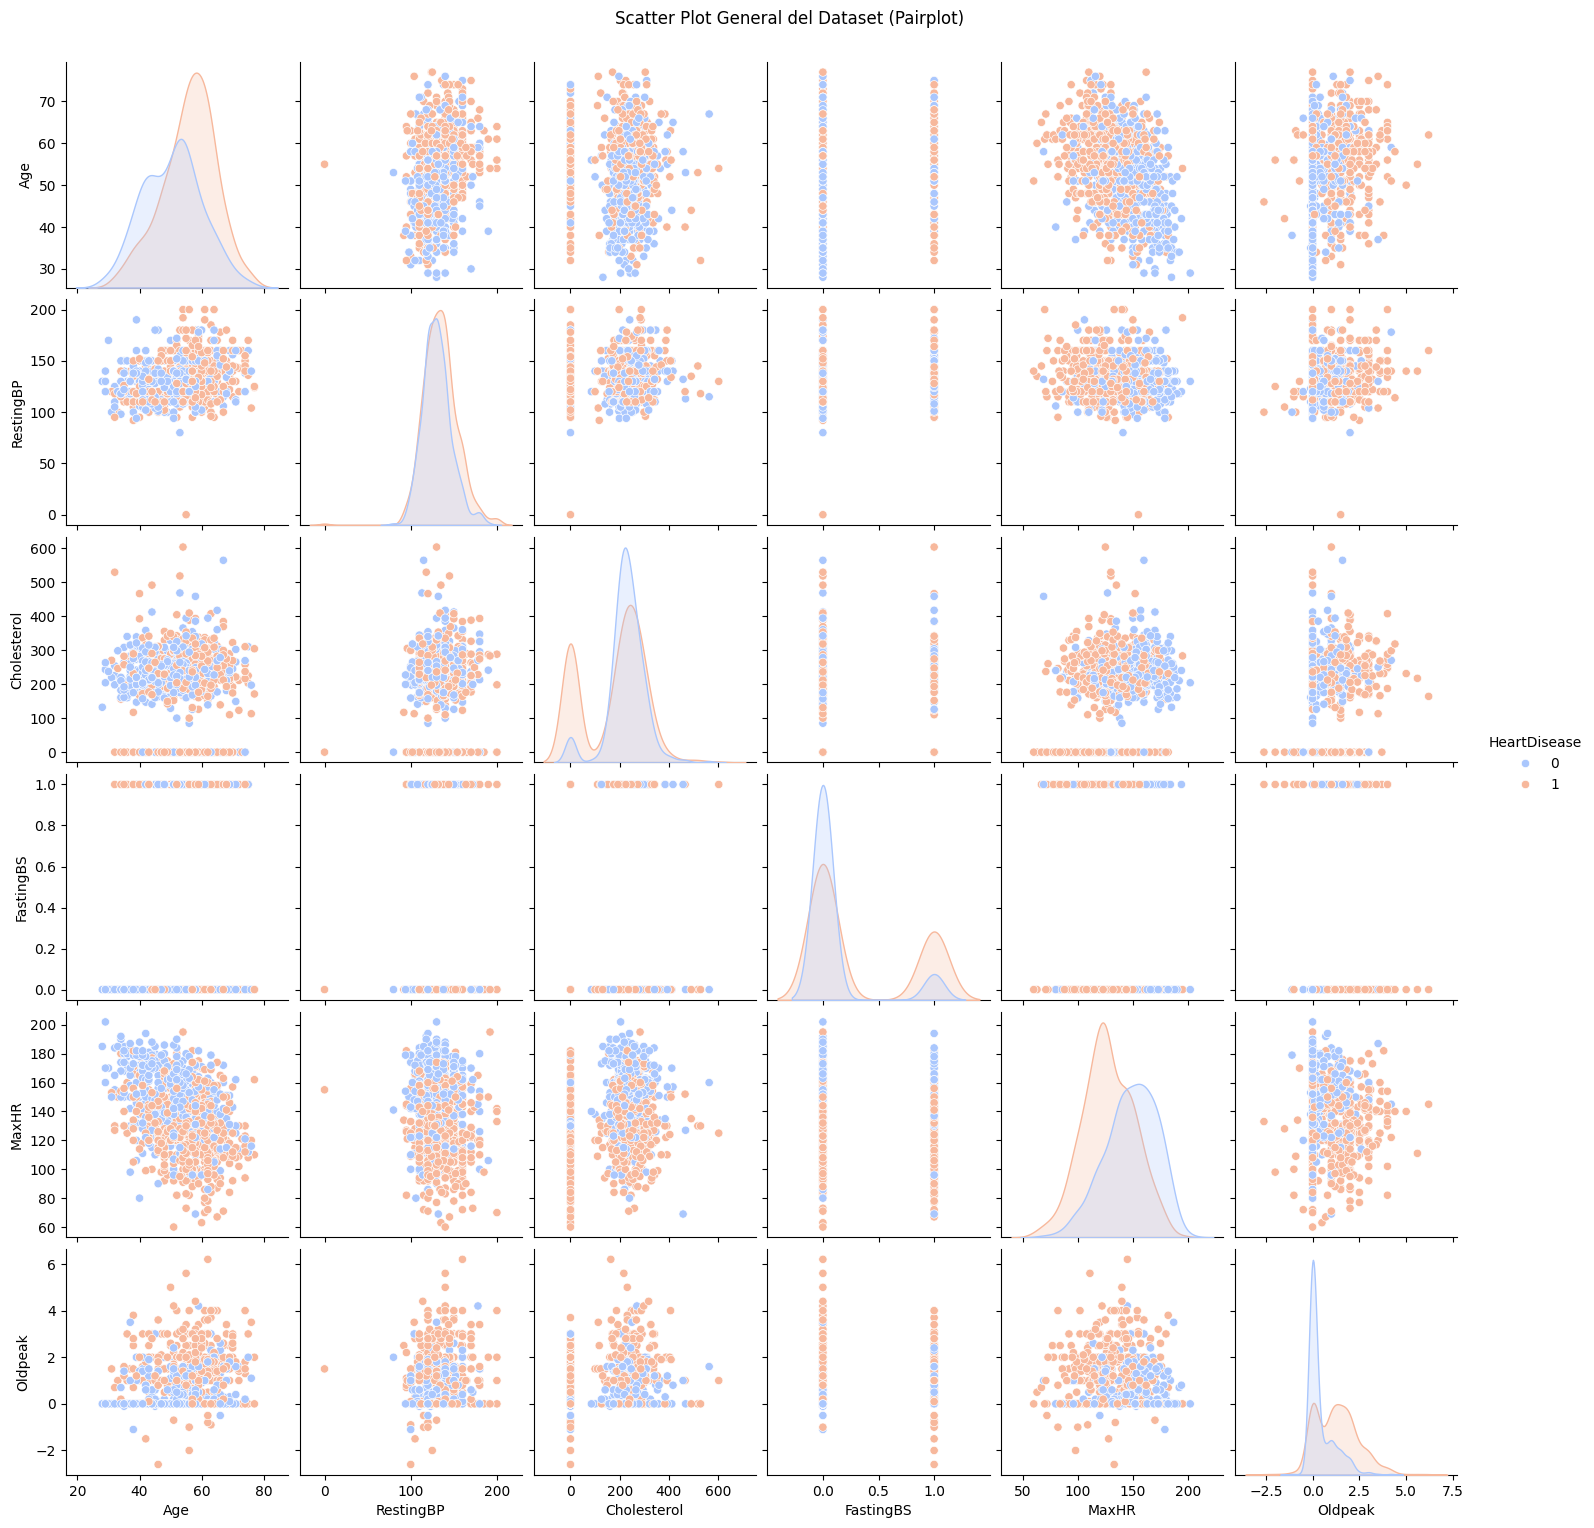

In [62]:
numericas = ["Age", "RestingBP", "Cholesterol","FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]

sns.pairplot(
    dataset[numericas],
    hue="HeartDisease",
    diag_kind="kde",
    palette="coolwarm"
)

plt.suptitle("Scatter Plot General del Dataset (Pairplot)", y=1.02)
plt.show()

### **Feature Engineering**

Aqui se importaran las librerias en su mayoria para el modelo de machine learning.
  * OneHotEncoder: Este modulo lo utilizaremos para cuantificar las variables categoricas con sus respectivos valores.
  * StandardScaler: Este modulo lo utilizaremos en las variables numericas para estandarizar sus valores en el mismo rango de numeros.
    * ColumnTransformer: Este lo utilizaremos simplemente por comodidad de aplicar transformaciones de OneHotEncoder a todas las columnas categoricas y StandardScaler a todas las numericas.

In [63]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','FastingBS']


preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', StandardScaler(), num_cols)
], remainder='drop')

#Para obtener nuestro dataset con las columnas correctas bastara con concatenar nuestras dos listas de columnas, tanto categoricas como numericas explcuyendo unicamente a nuestra variable objetivo.
X = dataset[ num_cols + cat_cols ]
y = dataset['HeartDisease']

Realizamos las tranformaciones previamente establecidas.

In [64]:
X_transformed = preprocessor.fit_transform(X)

A partir de este punto nos encargaremos de la creacion de nuestro modelo:

Importaremos de sklearn nuestro modelo KNN el cual usaremos para clasificas, asi como el train_test_split el cual nos ayudara a segmentar nuestro dataset.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


De igual manera utilizaremos una proporcion 80-20 y un random state para poder reproducir las mismas pruebas posteriormente.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

Instanciamos nuestro modelo y establecemos el numero de vecinos que queremos tomar en cuenta (N)


In [67]:
knn = KNeighborsClassifier(n_neighbors=5)

Ahora podremos entrenar a nuestro modelo con ayuda de la funcion .fit()

In [68]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

### **Prediction**

Generaremos una funcion que reciba una instancia individual (que siga el mismo formato de nuestro dataset, es decir los mismos campos) y le asigne una categoria segun nuestro modelo.

In [69]:
def clasificar(entrada):
  dataset_unico = pd.DataFrame([entrada])
  dataset_unico_transform = preprocessor.transform(dataset_unico)
  prediccion = knn.predict(dataset_unico_transform)[0]
  dataset_unico['HeartDisease'] = prediccion

  return prediccion, dataset_unico

Generaremos un diccionario de prueba con dichos valores.

In [70]:
nuevo_paciente = {
    "Age": 55,
    "RestingBP": 140,
    "Cholesterol": 200,
    "MaxHR": 150,
    "Oldpeak": 1.2,
    "FastingBS": 1,
    "Sex": "M",
    "ChestPainType": "ATA",
    "RestingECG": "Normal",
    "ExerciseAngina": "N",
    "ST_Slope": "Up"
}

In [71]:
prediccion, df_resultado = clasificar(nuevo_paciente)
print(f'La prediccion para esta instancia es: {prediccion}')
df_resultado

La prediccion para esta instancia es: 0


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,55,140,200,150,1.2,1,M,ATA,Normal,N,Up,0


### **Model Evaluation**

Utilizaremos el segmento de prueba para intentar predecir sus variables objetivo para posteriormente probarlas

In [72]:
y_pred = knn.predict(X_test)

#### **Matriz de Confusion**

Tanto para generar la matriz de confusion como para mostrar la accuracy utilizaremos su respectico metodo y les pasaremos como parametros tanto las variables predichas como las reales.

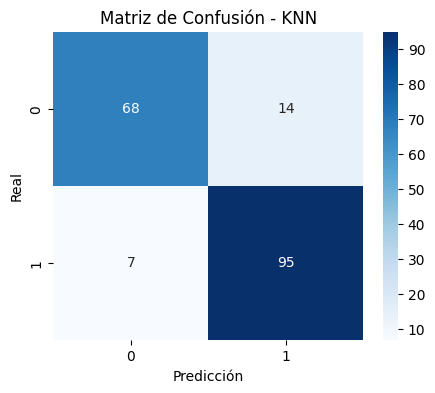

In [73]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

#### **Accuracy**

In [74]:
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.8858695652173914


Como podemos ver tenemos un 88 por ciento de accuracy por lo que es algo mejor que el perceptron linea.

## **Referencias**

> KNeighborsClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
> Dharmaraj. (2022, 23 mayo). K-Nearest Neighbor (KNN)-Using Python. Medium. https://medium.com/@draj0718/k-nearest-neighbor-knn-using-python-d0a6bb295e7d  
>  seaborn.pairplot — seaborn 0.13.2 documentation. (s. f.). https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot  
> Aviña Méndez, J. A. (2025, marzo 26). k-Nearest Neighbors (kNN)